# Reading in the data and preparing it 

In [1]:
import pandas as pd
import json
import numpy as np
from IPython.display import display

# reading in data
data = pd.read_csv('data/booksummaries.txt', sep='\t', header = None)
data.head(2)

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."


In [2]:
# columns 1 and 2 seem to have no useful information we will drop them 
data.drop(columns=[0, 1], inplace=True)
data[2] = data[2].astype(str)
data.head(2)

,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."


In [3]:
data[5][0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

In [4]:
# droping any without tags, should probably change the column names may takle later 

data[5].isnull().values.any()

data_2 = data.dropna(subset=[5])

data_2.head(2)


,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."


In [5]:
# column 5 with   

# so one of the categories we saw was Novel and another fiction, as we are largely dealing with 
# fiction in general, be it science fiction, romance, etc this is not terribly helpful 
# so as long novel or fiction are not the only tags we want to remove them
def remove_novel(x):
    if len(x) > 1 and 'Novel' in x:
        x.remove('Novel')
    if len(x) > 1 and 'Fiction' in x:
        x.remove('Fiction')   
    
    return x


# this turns the jason into a list
stdf = data_2[5].apply(json.loads)

# stdf[0].values()


# this gets us just the values of the newly created list  
stdf = stdf.apply(lambda x: x.values())

# print(stdf)

# not sure if this is necessary but it made me feel more comfortable
stdf = stdf.apply(lambda x: list(x))

# finally removing novel and fiction tags if there are more despcriptive ones
stdf = stdf.apply(remove_novel)

# print(stdf.isnull().values.any())

stdf

0        [Roman à clef, Satire, Children's literature, ...
1        [Science Fiction, Novella, Speculative fiction...
2                      [Existentialism, Absurdist fiction]
4        [Hard science fiction, Science Fiction, Specul...
5                                [War novel, Roman à clef]
                               ...                        
16549                                    [Science Fiction]
16551                                 [Thriller, Suspense]
16555                                           [Thriller]
16556                                      [Autobiography]
16558              [Epistolary novel, Speculative fiction]
Name: 5, Length: 12841, dtype: object

In [6]:
# getting the first category under the assumption it is the most importanty one
stdf = stdf.map(lambda x: x[0])

# I want to be able to use it for some more tests
category = stdf.copy()

In [7]:
# checking how many categories we have and how many exmaples of each
count_subj = stdf.explode().value_counts()
count_subj = count_subj.to_frame()
count_subj

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
...,...
Catastrophic literature,1
School story,1
Collage,1
Social criticism,1


In [8]:
# We have too many categories, 180, and many have one entry this is not data we can work with
# so lets look at categhories with over 50 entries

count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
Mystery,735
Crime Fiction,672
Fantasy,625
Thriller,568
Young adult literature,321


# Combining similar genre categries to make it more balanced 

In [9]:
# it's still very imbalanced data, so we will try and group some together i.e.mystery, crime fiction, thriller, spy  all into one, 
# young adult and childrens 

# expanding the mystery cataegory 
stdf = stdf.map(lambda x : 'Mystery' if(x == 'Crime Fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Thriller') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Spy fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Detective fiction') else x)

# comcinging fiction and novel 
stdf = stdf.map(lambda x : 'Fiction' if(x == 'Novel') else x)

# combining childrens lit and young adult 
stdf = stdf.map(lambda x : 'Children\'s literature' if(x == 'Young adult literature') else x)

# expanind historical novel category 
stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Historical fiction') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Alternate history') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'War novel') else x)



In [10]:
# double checking our new categories 
# not ideal but better will cut off everything after fantasy, and try with just those 7 remain categories 
count_subj = stdf.explode().value_counts()

count_subj

count_subj = count_subj.to_frame()
count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Mystery,2139
Fiction,1622
Children's literature,1480
Speculative fiction,1444
Historical novel,770
Fantasy,625
Non-fiction,167
Romance novel,140
Autobiography,94


In [11]:
# puting the category series nack into the data 

# saving this for clustering later 
cluster = data_2.copy()

data_2.insert(4, "category", stdf, True)

data_2.head(10)

,2,3,4,5,category,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",Roman à clef,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",Existentialism,The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
15,Book of Job,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",Religious text,The book of Job tells the story of an extreme...
20,Crash,J. G. Ballard,1973,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf...",Speculative fiction,The story is told through the eyes of narrato...


# Keeping top 7 categories

In [12]:
# Taking only the generes with enough data, not really ideal but I have close to 10K among 7 geners so hopefully will do 


data_3 = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
| (data_2['category'] == 'Fiction') | (data_2['category'] == 'Children\'s literature') 
| (data_2['category'] == 'Speculative fiction') | (data_2['category'] == 'Historical novel') | (data_2['category'] == 'Fantasy')]


# this excludes fiction as it is a rather nublues category 
# data_3 = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
# | (data_2['category'] == 'Children\'s literature') 
# | (data_2['category'] == 'Speculative fiction') | (data_2['category'] == 'Historical novel') | (data_2['category'] == 'Fantasy')]



data_3

# want to be able to change later 
data_4 = data_3.copy()

# data_2.loc[(data_2[2] == "White Noise")]


In [13]:
# see how many we have 
print(len(data_3))
data_3['category'].value_counts()

10636


Science Fiction          2556
Mystery                  2139
Fiction                  1622
Children's literature    1480
Speculative fiction      1444
Historical novel          770
Fantasy                   625
Name: category, dtype: int64

In [14]:
# seperating the categories from the data 
y = data_3['category']
y

1              Science Fiction
5             Historical novel
6        Children's literature
8              Science Fiction
9              Science Fiction
                 ...          
16541    Children's literature
16542                  Mystery
16549          Science Fiction
16551                  Mystery
16555                  Mystery
Name: category, Length: 10636, dtype: object

In [15]:
# continuation from above
data_3 = data_3.drop(columns=['category'])
data_3

,2,3,4,5,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Beginning several months after the events in ...
...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...


# SKLEARN

In [16]:
# the imbalanced data, startified  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3, y,
                                                stratify=y, 
                                                test_size=0.34)


In [17]:
y_train.value_counts()

Science Fiction          1687
Mystery                  1412
Fiction                  1070
Children's literature     977
Speculative fiction       953
Historical novel          508
Fantasy                   412
Name: category, dtype: int64

In [18]:
y_test.value_counts()

Science Fiction          869
Mystery                  727
Fiction                  552
Children's literature    503
Speculative fiction      491
Historical novel         262
Fantasy                  213
Name: category, dtype: int64

([<matplotlib.patches.Wedge at 0x196a90a0970>,
 [Text(0.8010426645457673, 0.7538770785595073, 'Science Fiction'),
  Text(-0.5948366453866798, 0.9252942047290263, 'Mystery'),
  Text(-1.0931756606927276, -0.1223395883147338, 'Fiction'),
  Text(-0.5685124594788895, -0.9416971824409714, "Children's literature"),
  Text(0.34674775137833863, -1.0439185777224516, 'Speculative fiction'),
  Text(0.9102339400616704, -0.6176359561746771, 'Historical novel'),
  Text(1.0813501500772855, -0.20169742915523833, 'fantasy')],
 [Text(0.4369323624795094, 0.41120567921427664, '24.0%'),
  Text(-0.324456352029098, 0.5047059298521962, '20.1%'),
  Text(-0.596277633105124, -0.06673068453530934, '15.2%'),
  Text(-0.31009770517030333, -0.5136530086041662, '13.9%'),
  Text(0.1891351371154574, -0.5694101333031554, '13.6%'),
  Text(0.4964912400336383, -0.336892339731642, '7.2%'),
  Text(0.5898273545876103, -0.1100167795392209, '5.9%')])

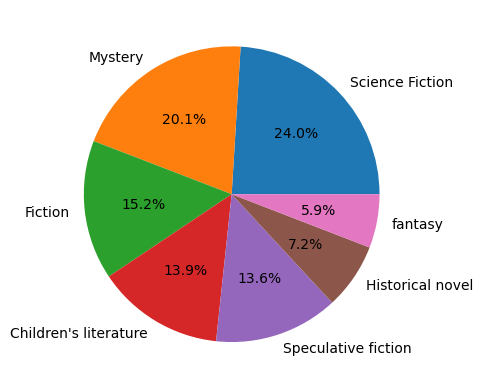

In [19]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

# with only 6 labels
# labels = 'Science Fiction', 'Mystery', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'


fig, ax = plt.subplots()
ax.pie(y_train.value_counts(), labels = labels, autopct='%1.1f%%')

# Radom oversampling to balance data 

In [20]:
#  our balanced data created with Random overspampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(X_train_ros.shape)
print(y_train_ros.shape)

(11809, 5)
(11809,)


([<matplotlib.patches.Wedge at 0x196aad1bf10>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Science Fiction'),
  Text(0.24477296280441296, 1.0724207181325571, 'Mystery'),
  Text(-0.68583886831644, 0.8600145619153347, 'Fiction'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, "Children's literature"),
  Text(-0.6858386267552901, -0.8600147545539077, 'Speculative fiction'),
  Text(0.24477326402622548, -1.0724206493806185, 'Historical novel'),
  Text(0.9910658791734962, -0.47727185454211024, 'fantasy')])

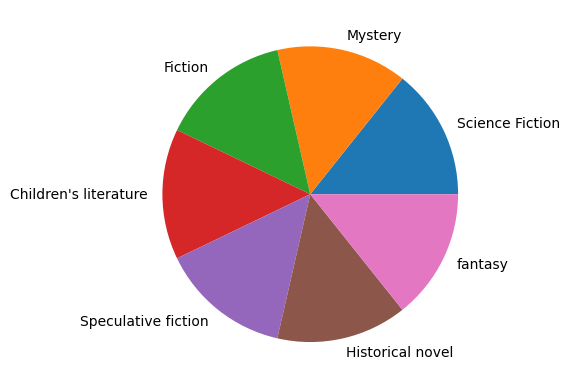

In [21]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

# with only 6 labels 
# labels = 'Science Fiction', 'Mystery', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

fig, ax = plt.subplots()
ax.pie(y_train_ros.value_counts(), labels = labels)

In [22]:
# just checking the data, probably don't need this 
y_train

11481    Historical novel
4801      Science Fiction
938       Science Fiction
2901              Fiction
4829              Fiction
               ...       
2193              Fiction
14800     Science Fiction
2793      Science Fiction
15412             Fantasy
12977             Mystery
Name: category, Length: 7019, dtype: object

# Navie Bayes using a pipline with unbalanced data

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

columns = ["algo", "data", "grid", "mean", "report", "confusion matrix"]

reports = pd.DataFrame([], columns= columns) 

reports

,algo,data,grid,mean,report,confusion matrix


In [24]:
# from pandas.table.plotting import table # EDIT: see deprecation warnings below

# I am starting with a no parameters and then use Gridsearch to choose the parameters, and then rebuild it.
# I am sure there is a better way to do it but this is what I know 

# cant use this X_data_counts = vectorizer.fit_transform(X_data.values.astype('U’))

text_clf_1 = Pipeline([
#     I get this with nothing this np.mean(predicted == y_test) 0.3842963782139895
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# I use this to run it and get  the defualt result 
# I block it out becuase I worry it might mess up my grid search I don't think this is true
text_clf_1.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_1.predict(X_test[6])

print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["Naive Bayes", "Unbalanced", "Default", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 

# reports.append(metrics.classification_report(y_test, predicted))
# print(metrics.classification_report(y_test, predicted))
# test = metrics.classification_report(y_test, predicted)
# metrics.confusion_matrix(y_test, predicted)


0.3784904617085983


C:\Users\micha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# this chooses a range of paramenters to search 
#   'vect__analyzer': ['word', stemming] might try steeming later 
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False)

# }

# Naive bayes unbolanced data, with parameters chosen by gridsearch

In [26]:
# this actually does teh seracing and takes a really long time, you can use just part of the data
# and it goes much faster or use all teh data and let it run overnight 

# gs_clf_1 = GridSearchCV(text_clf_1, parameters, cv=5, n_jobs=-1)

# gs_clf_1 = gs_clf_1.fit(X_train[6], y_train)

# # gs_clf_1 = gs_clf_1.fit(X_train[6][:300], y_train[:300])

# print(gs_clf_1.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_1.best_params_[param_name]))

In [27]:
# # going to block this out for now 
# # so now to make my life easier I would rebuild this using the parameters choosen by the gride search than test mt predictions

# parameters choosen by grid search
# 0.5835606646725677
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 4000
# vect__min_df: 5
# vect__ngram_range: (1, 3)
# vect__stop_words: 'english'

text_clf_1 = Pipeline([
    ('vect', CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=4000, ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB()),
])

# this will build my model 

text_clf_1.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_1.predict(X_test[6])
print(np.mean(predicted == y_test))



reports.loc[len(reports.index)] = ["Naive Bayes", "Unbalanced", "Chosen", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 

# here i can test it 
# this should show all the metrics ohh but to show the meteric I actually need my predictions which I don't have yet 
# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)




0.5971799834116671


In [28]:
# cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1.classes_, )
# disp.plot(xticks_rotation = 'vertical')


# Naive Bayes with ROS data

In [29]:
# I am starting with a no parameters and then use Gridsearch to choose the parameters, and then rebuild it.
# I am sure there is a better way to do it but this is what I know 

# cant use this X_data_counts = vectorizer.fit_transform(X_data.values.astype('U’))

text_clf_1_ros = Pipeline([
#     I get this with nothing this np.mean(predicted == y_test) 0.6212330660768592
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# # maybe I will use this to test 
text_clf_1_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_1_ros.predict(X_test[6])

print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["Naive Bayes", "ROS", "Default", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted)



0.6300801769422173


In [30]:
# cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1_ros.classes_, )
# disp.plot(xticks_rotation = 'vertical')


In [31]:
# The grid search 
# this chooses a range of paramenters to search 
#   'vect__analyzer': ['word', stemming] might try steeming later 
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False)

# }

In [32]:
# this actually does the seracing and takes a really long time, you can use just part of the data
# and it goes much faster or use all teh data and let it run overnight 

# gs_clf_1_ros = GridSearchCV(text_clf_1_ros, parameters, cv=5, n_jobs=-1)

# gs_clf_1_ros = gs_clf_1_ros.fit(X_train_ros[6], y_train_ros)

# # gs_clf_1_ros = gs_clf_1_ros.fit(X_train_ros[6][:300], y_train_ros[:300])

# print(gs_clf_1_ros.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_1_ros.best_params_[param_name]))

In [33]:
# # so now to make my life easier I would rebuild this using the parameters choosen by the gride search than test mt predictions

# Parameter choosen bt grid search
# 0.7015863554708696
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 5000
# vect__min_df: 2
# vect__ngram_range: (1, 1)
# vect__stop_words: 'english'

from sklearn.pipeline import Pipeline
text_clf_1_ros = Pipeline([
    ('vect', CountVectorizer(min_df = 2, lowercase= True, stop_words='english', max_features=5000, ngram_range=(1,1))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB()),
])

# # this will build my model 

text_clf_1_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_1_ros.predict(X_test[6])
print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["Naive Bayes", "ROS", "Chosen", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# here i can test it 
# this should show all the metrics ohh but to show the meteric I actually need my predictions which I don't have yet 
# from sklearn import metrics
# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted)

0.6143212607132983


In [34]:
# cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1_ros.classes_, )
# disp.plot(xticks_rotation = 'vertical')

# Support Vector Machines (SVM) classifier, did we learn this??

In [35]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])



reports.loc[len(reports.index)] = ["SVM", "Unbalanced", "Default", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# from sklearn import metrics
# print(np.mean(predicted == y_test))

# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted)

In [36]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False),
#     'clf__alpha': (1e-1, 1e-2, 1e-3),
# }

In [37]:
# gs_clf_2 = GridSearchCV(text_clf_2, parameters, cv=5, n_jobs=-1)

# # or is this the fitting, this is the part that takes a long time  
# # a small portation
# gs_clf_2 = gs_clf_2.fit(X_train[6][:500], y_train[:500])
# # all of it 
# # gs_clf_2 = gs_clf_2.fit(X_train[6], y_train)

In [38]:
# # so now AM I using the best model or do I need to go back and put this in the model?
# print(gs_clf_2.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_2.best_params_[param_name]))

In [39]:
# # so I ran the gridsearch over night and got these results   

# unbalanced
# 0.593532885371802
# clf__alpha: 0.001
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 5000
# vect__min_df: 2
# vect__ngram_range: (1, 3)
# vect__stop_words: 'english'


from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_2 = Pipeline([
     ('vect', CountVectorizer(stop_words = 'english', ngram_range= (1,3), min_df = 2, max_features = 5000, lowercase = True)),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])

text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])
print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["SVM", "Unbalanced", "Chosen", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# should propably double check this so this is really good  but I need to have predicted something 
# from sklearn import metrics
# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted)

0.595797622338955


# SVM with ROS 

In [40]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 
# seem to do slighlt better with fewer parameters of maybe whatever is default 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_2_ros = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# is this needed looks like no
text_clf_2_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_2_ros.predict(X_test[6])
print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["SVM", "ROS", "Default", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted)


0.6513685374619851


In [41]:
# # here we let the gridsearch do it's business 
# gs_clf_2_ros = GridSearchCV(text_clf_2_ros, parameters, cv=5, n_jobs=-1)
# gs_clf_2_ros = gs_clf_2_ros.fit(X_train_ros[6][:300], y_train_ros[:300])

# print(gs_clf_2_ros.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_2_ros.best_params_[param_name]))

In [42]:
# I got these results from running the parameter all night 
# 0.7387630852897835
# clf__alpha: 0.001
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 5000
# vect__min_df: 2
# vect__ngram_range: (1, 1)
# vect__stop_words: 'english'

# so we build the model 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_2_ros = Pipeline([
     ('vect', CountVectorizer(stop_words = 'english', ngram_range = (1,1), min_df = 2, max_features = 5000, lowercase = True )),
     ('tfidf', TfidfTransformer(use_idf = True)),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42, alpha=1e-3, 
                           max_iter=5, tol=None)),
])

# is this needed looks like no
text_clf_2_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_2_ros.predict(X_test[6])

print(np.mean(predicted == y_test))

# so it lets me use it like a predection but is it using what I want it to
# from sklearn import metrics

# print(metrics.classification_report(y_test, predicted))
# print(metrics.confusion_matrix(y_test, predicted))

# test = metrics.classification_report(y_test, predicted)

reports.loc[len(reports.index)] = ["SVM", "ROS", "Chosen", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# print(test)

0.5988388166989218


# a simpler problem

In [43]:
simplified_data = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
| (data_2['category'] == 'Fiction') | (data_2['category'] == 'Children\'s literature')]

# want to be able to use this latter

simp_data_cluster = simplified_data.copy()
print(len(simplified_data))
print(simplified_data['category'].value_counts())

7797
Science Fiction          2556
Mystery                  2139
Fiction                  1622
Children's literature    1480
Name: category, dtype: int64


([<matplotlib.patches.Wedge at 0x196ae37c0d0>,
 [Text(0.5664215670073517, 0.9429563131073126, 'Science Fiction'),
  Text(-1.0734881300118728, 0.24004840079369946, 'Mystery'),
  Text(-0.299123009752443, -1.0585487353148366, 'Fiction'),
  Text(0.9101447320340021, -0.6177674050569152, "Children's literature")],
 [Text(0.30895721836764634, 0.5143398071494433, '32.8%'),
  Text(-0.5855389800064761, 0.13093549134201787, '27.4%'),
  Text(-0.16315800531951433, -0.5773902192626381, '20.8%'),
  Text(0.4964425811094556, -0.33696403912195366, '19.0%')])

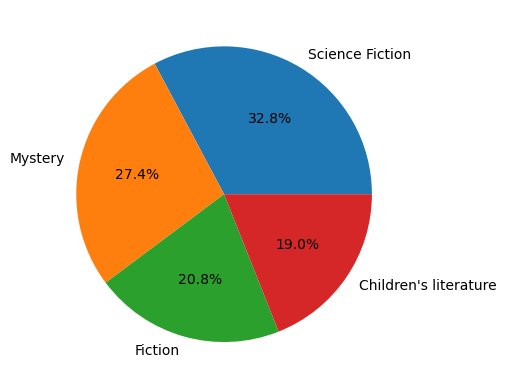

In [44]:
labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature'



fig, ax = plt.subplots()
ax.pie(simplified_data['category'].value_counts(), labels = labels, autopct='%1.1f%%')

In [45]:
y = simplified_data['category']

print(y)

simplified_data = simplified_data.drop(columns=['category'])

print(simplified_data.head(2))

1              Science Fiction
6        Children's literature
8              Science Fiction
9              Science Fiction
21             Science Fiction
                 ...          
16541    Children's literature
16542                  Mystery
16549          Science Fiction
16551                  Mystery
16555                  Mystery
Name: category, Length: 7797, dtype: object
                      2                  3     4  \
1    A Clockwork Orange    Anthony Burgess  1962   
6  A Wizard of Earthsea  Ursula K. Le Guin  1968   

                                                   5  \
1  {"/m/06n90": "Science Fiction", "/m/0l67h": "N...   
6  {"/m/0dwly": "Children's literature", "/m/01hm...   

                                                   6  
1   Alex, a teenager living in near-future Englan...  
6   Ged is a young boy on Gont, one of the larger...  


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(simplified_data, y,
                                                stratify=y, 
                                                test_size=0.34)

# NB simple data, parameters from grid search

0.7551867219917012


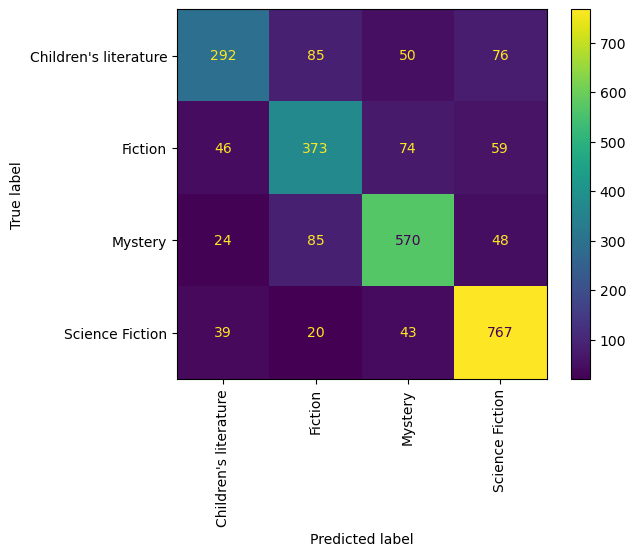

In [47]:
# # going to block this out for now 
# # so now to make my life easier I would rebuild this using the parameters choosen by the gride search than test mt predictions

# parameters choosen by grid search
# 0.5835606646725677
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 4000
# vect__min_df: 5
# vect__ngram_range: (1, 3)
# vect__stop_words: 'english'

text_clf_1 = Pipeline([
    ('vect', CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=4000, ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB()),
])

# this will build my model 

text_clf_1.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_1.predict(X_test[6])
print(np.mean(predicted == y_test))


reports.loc[len(reports.index)] = ["Naive Bayes", "Unbalanced and Simplified", "Chosen", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 

# here i can test it 
# this should show all the metrics ohh but to show the meteric I actually need my predictions which I don't have yet 
# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)

cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1.classes_, )
disp.plot(xticks_rotation = 'vertical')

# SVM with simple data 

0.7763108261033572


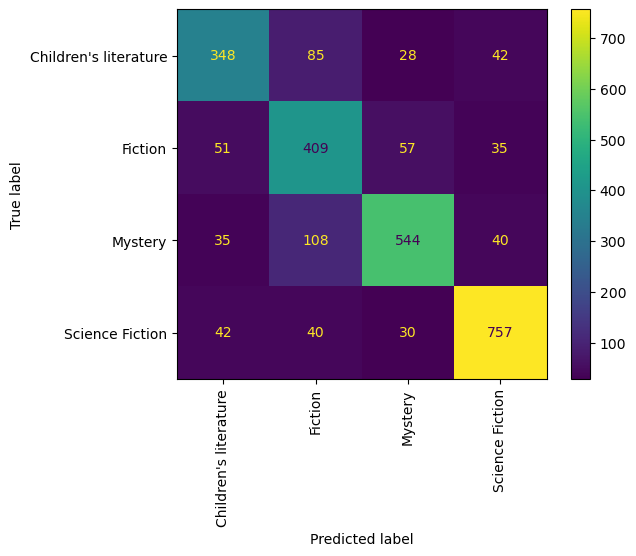

In [48]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])

reports.loc[len(reports.index)] = ["SVM", "Unbalanced and Simplified", "Defulat", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


from sklearn import metrics
print(np.mean(predicted == y_test))

# so Yes it seems to do much better with that 
# print(metrics.classification_report(y_test, predicted))
# metrics.confusion_matrix(y_test, predicted)
cm = confusion_matrix(y_test, predicted, labels=text_clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_2.classes_, )
disp.plot(xticks_rotation = 'vertical')

# Clustering with simplified data 

In [49]:
# turning our book descriptions into a vector

count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=5000)
# does not seem to good with that 
# count_vect = CountVectorizer()

# not sure if i needed to us unicode 
X_train_counts = count_vect.fit_transform(simp_data_cluster[6].astype('U'))
X_train_counts.shape

# this is just showing us where are words are at 
count_vect.vocabulary_.get(u'algorithm')
count_vect.vocabulary_

# tf -idf stuff
# from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(7797, 5000)

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_train_tfidf)
kmeans.labels_
kmeans.cluster_centers_

array([[0.00458299, 0.0013706 , 0.00081745, ..., 0.00052529, 0.00291624,
        0.00055588],
       [0.00159914, 0.00169871, 0.00100556, ..., 0.0005965 , 0.00062026,
        0.00072133],
       [0.0016338 , 0.00129375, 0.00071541, ..., 0.00051635, 0.00098181,
        0.00105511]])

In [51]:
simp_data_cluster.insert(6, 'label', kmeans.labels_)

# often need a copy ltter
sdc_copy = simp_data_cluster.copy

In [52]:
for i in range(3):
#     print('hello')
    print(i)
    print(len(simp_data_cluster[simp_data_cluster['label'] == i]))
    print(simp_data_cluster[simp_data_cluster['label'] == i]['category'].value_counts())    
    print(simp_data_cluster[simp_data_cluster['label'] == i][3].value_counts())

0
1112
Science Fiction          1066
Mystery                    21
Children's literature      17
Fiction                     8
Name: category, dtype: int64
Judy Blundell       36
David Weber         22
Alan Dean Foster    18
Philip K. Dick      17
Isaac Asimov        17
                    ..
Robert Mason         1
William C. Dietz     1
F. Paul Wilson       1
Andy Mangels         1
Aaron Johnston       1
Name: 3, Length: 407, dtype: int64
1
2391
Fiction                  848
Children's literature    821
Mystery                  515
Science Fiction          207
Name: category, dtype: int64
Agatha Christie      45
Rex Stout            39
Beverly Cleary       19
Jacqueline Wilson    19
Judy Blume           17
                     ..
Gary W. Bargar        1
Isabel Allende        1
Damian McNicholl      1
K.M. Soehnlein        1
Edward Falco          1
Name: 3, Length: 1213, dtype: int64
2
4294
Mystery                  1603
Science Fiction          1283
Fiction                   766
Childre

In [53]:
simp_data_cluster[simp_data_cluster['label'] == 0].head(30)

,2,3,4,5,category,6,label
61,The Three Stigmata of Palmer Eldritch,Philip K. Dick,1965,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The story begins in a future world where glob...,0
62,Time out of Joint,Philip K. Dick,1959,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"As the novel opens, its protagonist Ragle Gum...",0
70,Ringworld,Larry Niven,1970,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The novel opens in 2850. Louis Gridley Wu is ...,0
75,Starship Troopers,Robert A. Heinlein,1959-12,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Starship Troopers takes place in the midst of...,0
80,The Time Machine,H. G. Wells,1895,"{""/m/06n90"": ""Science Fiction"", ""/m/0dwly"": ""C...",Science Fiction,The book's protagonist is an English scientis...,0
92,Tunnel in the Sky,Robert A. Heinlein,1955,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,A Malthusian catastrophe on Earth has been av...,0
97,The Fountains of Paradise,Arthur C. Clarke,1979,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"In the 22nd century, Dr Vannevar Morgan is a ...",0
101,The Wanderer,Fritz Leiber,1964,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The novel is set in a future a few decades ah...,0
102,2010: Odyssey Two,Arthur C. Clarke,1982-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The story is set nine years after the failure...,0
108,Twenty Thousand Leagues Under the Sea,Emanuel J Mickel,1869,"{""/m/06n90"": ""Science Fiction"", ""/m/0dwly"": ""C...",Science Fiction,"As the story begins in 1866, a mysterious sea...",0


In [54]:
simp_data_cluster[(simp_data_cluster['label'] == 1) & (simp_data_cluster['category'] == "Fiction")].head(30)

,2,3,4,5,category,6,label
25,The Cider House Rules,John Irving,1985,"{""/m/02xlf"": ""Fiction""}",Fiction,Homer Wells grows up in an orphanage where he...,1
31,Death of a Hero,Richard Aldington,NaN,"{""/m/02xlf"": ""Fiction""}",Fiction,Death of a Hero is the story of a young Engli...,1
109,Keep the Aspidistra Flying,George Orwell,1936,"{""/m/05hgj"": ""Novel""}",Fiction,Gordon Comstock has 'declared war' on what he...,1
123,The Grapes of Wrath,John Steinbeck,1939,"{""/m/05hgj"": ""Novel""}",Fiction,The narrative begins just after Tom Joad is p...,1
227,Native Son,Richard Wright,1940,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}",Fiction,"Bigger Thomas wakes up in a dark, small room ...",1
230,Imitation of Life,Fannie Hurst,1933,"{""/m/05hgj"": ""Novel""}",Fiction,The story is a look at early 20th-century Ame...,1
234,Les Misérables,Victor Hugo,1862,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}",Fiction,The story starts in 1815 in Digne. The peasan...,1
235,Dodsworth,Sinclair Lewis,1929,"{""/m/05hgj"": ""Novel""}",Fiction,Samual 'Sam' Dodsworth is an ambitious and in...,1
261,The Girl Who Loved Tom Gordon: A Novel,Stephen King,1999-04-06,"{""/m/02xlf"": ""Fiction""}",Fiction,The story is set in motion by a family hiking...,1
290,The Human Stain,Philip Roth,2000-05,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}",Fiction,"The story is told by Nathan Zuckerman, a writ...",1


In [55]:
simp_data_cluster[(simp_data_cluster['label'] == 1) & (simp_data_cluster['category'] == "Children's literature")].head(30)

,2,3,4,5,category,6,label
34,The Metamorphosis,NaN,1915,"{""/m/0dwly"": ""Children's literature"", ""/m/0pym...",Children's literature,"One day Gregor Samsa, a traveling salesman, w...",1
73,Sense and Sensibility,Jane Austen,1811,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"When Mr. Dashwood dies, his estate, Norland P...",1
122,Around the World in Eighty Days,Jules Verne,NaN,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"The story starts in London on October 1, 1872...",1
191,Emma,Jane Austen,1815-12,"{""/m/0dwly"": ""Children's literature"", ""/m/0d6g...",Children's literature,"Emma Woodhouse, aged 20 at the start of the n...",1
192,Charlie and the Chocolate Factory,Roald Dahl,1964,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,The story revolves around a poor young boy na...,1
193,Anne of Green Gables,Lucy Maud Montgomery,1908-06,"{""/m/0dwly"": ""Children's literature"", ""/m/05hg...",Children's literature,"Anne, a young orphan from fictional community...",1
236,Lost Horizon,James Hilton,1933,"{""/m/0dwly"": ""Children's literature"", ""/m/08sd...",Children's literature,The origin of the eleven numbered chapters of...,1
294,The Adventures of Pinocchio,Carlo Collodi,1883,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,The story begins in Tuscany. A carpenter has ...,1
374,Sounder,William Armstrong,1969,"{""/m/0dwly"": ""Children's literature""}",Children's literature,A black sharecropper's family is poor and hun...,1
396,The Railway Children,E. Nesbit,1906,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"The story concerns a family who move to ""Thre...",1


In [56]:
simp_data_cluster[(simp_data_cluster['label'] == 2) & (simp_data_cluster['category'] == "Mystery")].head(30)

,2,3,4,5,category,6,label
90,The Cardinal of the Kremlin,Tom Clancy,1988,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,CIA analyst Jack Ryan attends a diplomatic co...,2
91,Debt of Honor,Tom Clancy,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,"In New York City, Japanese industrialist Raiz...",2
156,Dr. No,Ian Fleming,1958-03-31,"{""/m/06wkf"": ""Spy fiction""}",Mystery,After recovering from tetrodotoxin poisoning ...,2
188,Clear and Present Danger,Tom Clancy,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Myster...",Mystery,When U.S. Coast Guard Cutter Panache intercep...,2
221,Funeral in Berlin,Len Deighton,1964,"{""/m/06wkf"": ""Spy fiction"", ""/m/02xlf"": ""Ficti...",Mystery,"The protagonist, who is unnamed, travels to B...",2
223,Kim,Rudyard Kipling,1901,"{""/m/06wkf"": ""Spy fiction"", ""/m/05hgj"": ""Novel...",Mystery,Kim (Kimball O'Hara) is the orphaned son of a...,2
259,Dolores Claiborne,Stephen King,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/0dwly"": ""Childre...",Mystery,"As the story begins, Dolores Claiborne is in ...",2
260,Gerald's Game,Stephen King,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/014dfn"": ""Specul...",Mystery,The story begins with Jessie Burlingame and h...,2
278,The Big Sleep,Raymond Chandler,1939,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/028v3"": ""Det...",Mystery,Private investigator Philip Marlowe is called...,2
291,Picnic at Hanging Rock,Joan Lindsay,1967,"{""/m/02n4kr"": ""Mystery"", ""/m/0hwxm"": ""Historic...",Mystery,Picnic at Hanging Rock centers around a trip ...,2


In [57]:
simp_data_cluster[(simp_data_cluster['label'] == 2) & (simp_data_cluster['category'] == "Science Fiction")].head(30)

,2,3,4,5,category,6,label
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",2
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul...",2
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...,2
21,Children of Dune,Frank Herbert,1976,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Nine years after Emperor Paul Muad'dib walked...,2
23,Chapterhouse Dune,Frank Herbert,1985-04,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The situation is desperate for the Bene Gesse...,2
26,Dracula,Bram Stoker,1897,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"The novel is told in epistolary format, as a ...",2
29,Dune Messiah,Frank Herbert,1969,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Twelve years after the events described in Du...,2
39,God Emperor of Dune,Frank Herbert,1981-05-28,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The seemingly immortal God Emperor Leto II ha...,2
44,Heretics of Dune,Frank Herbert,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Much has changed in the millennium and a half...,2
48,Icehenge,Kim Stanley Robinson,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Icehenge is part mystery, part psychological ...",2


([<matplotlib.patches.Wedge at 0x196b79b57e0>,
 [Text(-0.17455075983859217, 1.086062628138806, 'label 2'),
  Text(-0.3131711440547169, -1.0544779914874751, 'label 1'),
  Text(0.9914226159955862, -0.4765303731059213, 'label 0')],
 [Text(-0.09520950536650481, 0.5923977971666213, '55.1%'),
  Text(-0.17082062402984557, -0.5751698135386227, '30.7%'),
  Text(0.5407759723612288, -0.25992565805777523, '14.3%')])

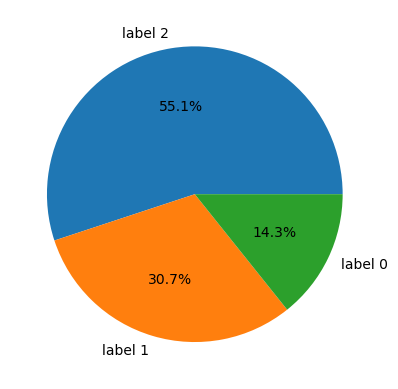

In [58]:
labels = 'label 2', 'label 1', 'label 0'


fig, ax = plt.subplots()
ax.pie(simp_data_cluster['label'].value_counts(), labels = labels, autopct='%1.1f%%')

# Clustering with the data I cluseterd 

In [59]:
# turning our book descriptions into a vector

count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=5000)
# does not seem to good with that 
# count_vect = CountVectorizer()

# not sure if i needed to us unicode 
X_train_counts = count_vect.fit_transform(data_4[6].astype('U'))
X_train_counts.shape

# this is just showing us where are words are at 
count_vect.vocabulary_.get(u'algorithm')
count_vect.vocabulary_

# tf -idf stuff
# from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(10636, 5000)

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_train_tfidf)
kmeans.labels_
kmeans.cluster_centers_




array([[4.63398126e-03, 1.29855798e-03, 7.13387676e-04, ...,
        1.09308224e-03, 3.79086799e-03, 9.16535079e-04],
       [2.15542151e-03, 8.82535653e-04, 5.44138540e-04, ...,
        5.83729176e-05, 1.17544323e-03, 1.05019049e-03],
       [1.14427387e-03, 1.97337187e-03, 7.35692871e-04, ...,
        3.66287202e-04, 4.53650584e-04, 4.92704563e-04],
       [1.45718859e-03, 1.18886807e-03, 8.37527736e-04, ...,
        5.38502713e-04, 4.57142207e-04, 1.12326974e-03],
       [1.82295183e-03, 1.08749482e-03, 6.66175860e-04, ...,
        2.76995879e-04, 9.91348504e-04, 4.92379443e-04]])

In [61]:

data_labels = data_4.copy()



# zero_cat = data_labels[data_labels['labels'] == 0]

# one_cat = data_labels[data_labels['labels'] == 1]

# two_cat = data_labels[data_labels['labels'] == 2]

# three_cat = data_labels[data_labels['labels'] == 3]

# four_cat = data_labels[data_labels['labels'] == 4]
# data_labels['labels'] = kmeans.labels_

data_labels.insert(6, 'label', kmeans.labels_)

data_4

,2,3,4,5,category,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...


In [62]:
data_labels
# data_labels.reset_index()

  

,2,3,4,5,category,6,label
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",3
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge...",2
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger...",4
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul...",3
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...,3
...,...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...,3
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...,3
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...,3
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...,3


In [63]:
# categories = [zero_cat, one_cat, two_cat, three_cat]

# for i in range(len(categories)):
#     print(i)
#     print(len(categories[i]['category']))
#     print(categories[i]['category'].value_counts())    

print(len(data_labels))

for i in range(5):
#     print('hello')
    print(i)
    print(len(data_labels[data_labels['label'] == i]))
    print(data_labels[data_labels['label'] == i]['category'].value_counts())    
    print(data_labels[data_labels['label'] == i][3].value_counts())  

# print('0')
# print(zero_cat['category'].value_counts())

# print('1')
# print(one_cat['category'].value_counts())

# print('2')
# print(two_cat['category'].value_counts())

# print(3)
# print(three_cat['category'].value_counts())

# print(4)
# print(four_cat['category'].value_counts())

10636
0
1130
Science Fiction          1000
Speculative fiction        68
Historical novel           27
Fantasy                    13
Mystery                    11
Children's literature       8
Fiction                     3
Name: category, dtype: int64
Judy Blundell       35
Alan Dean Foster    20
Isaac Asimov        19
Philip K. Dick      18
Arthur C. Clarke    18
                    ..
John Scalzi          1
Marc Platt           1
David A. McIntee     1
Paul Leonard         1
John F. Carr         1
Name: 3, Length: 411, dtype: int64
1
435
Science Fiction          176
Speculative fiction       59
Historical novel          55
Children's literature     53
Mystery                   51
Fiction                   25
Fantasy                   16
Name: category, dtype: int64
K. A. Applegate              54
Edgar Rice Burroughs         26
Patrick O'Brian              19
C. S. Forester                9
Jules Verne                   6
                             ..
Andrew Keith                  

In [64]:
data_labels[(data_labels['label'] == 3) & (data_labels['category'] != 'Mystery')].head(10)

,2,3,4,5,category,6,label
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",3
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul...",3
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...,3
20,Crash,J. G. Ballard,1973,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf...",Speculative fiction,The story is told through the eyes of narrato...,3
23,Chapterhouse Dune,Frank Herbert,1985-04,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The situation is desperate for the Bene Gesse...,3
29,Dune Messiah,Frank Herbert,1969,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Twelve years after the events described in Du...,3
34,The Metamorphosis,NaN,1915,"{""/m/0dwly"": ""Children's literature"", ""/m/0pym...",Children's literature,"One day Gregor Samsa, a traveling salesman, w...",3
39,God Emperor of Dune,Frank Herbert,1981-05-28,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The seemingly immortal God Emperor Leto II ha...,3
47,Johnny Got His Gun,Dalton Trumbo,1939,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}",Fiction,"Joe Bonham, a young soldier serving in World ...",3
48,Icehenge,Kim Stanley Robinson,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Icehenge is part mystery, part psychological ...",3


# Data I did not cluster 

In [65]:
cluster.insert(4, "category", category, True)




In [66]:
cluster

# turning our book descriptions into a vector

count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=5000)
# does not seem to good with that 
# count_vect = CountVectorizer()

# not sure if i needed to us unicode 
X_train_counts = count_vect.fit_transform(cluster[6].astype('U'))
X_train_counts.shape

# this is just showing us where are words are at 
count_vect.vocabulary_.get(u'algorithm')
count_vect.vocabulary_

# tf -idf stuff
# from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(12841, 5000)

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_train_tfidf)
len(kmeans.labels_)
# kmeans.cluster_centers_

12841

In [68]:
cluster.insert(6, 'label', kmeans.labels_)



0    5172
3    2920
2    2079
1    1340
4    1330
Name: label, dtype: int64


([<matplotlib.patches.Wedge at 0x196b153ea70>,
 [Text(0.3307942122960857, 1.0490830229831252, 'lable 0'),
  Text(-1.0941148470874134, -0.11363406787969017, 'label 3'),
  Text(-0.26605026370239554, -1.0673412093533565, 'label 2'),
  Text(0.6139912067420895, -0.9126964435360712, 'label 1'),
  Text(1.0422791278053547, -0.35164501950306265, 'label 4')],
 [Text(0.1804332067069558, 0.572227103445341, '40.3%'),
  Text(-0.5967899165931345, -0.06198221884346736, '22.7%'),
  Text(-0.14511832565585212, -0.5821861141927399, '16.2%'),
  Text(0.3349042945865942, -0.49783442374694786, '10.4%'),
  Text(0.5685158878938298, -0.1918063742743978, '10.4%')])

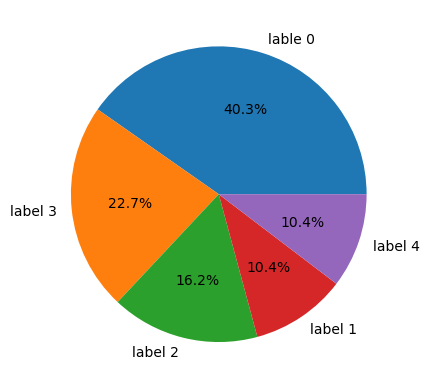

In [69]:
cluster2 = cluster.copy()
labels = 'lable 0', 'label 3', 'label 2', 'label 1', 'label 4'


print(cluster2['label'].value_counts())

fig, ax = plt.subplots()
ax.pie(cluster2['label'].value_counts(), labels = labels, autopct='%1.1f%%')

In [70]:
cluster2['category'].value_counts()

Science Fiction            2556
Speculative fiction        1444
Children's literature      1159
Novel                       839
Fiction                     783
                           ... 
Catastrophic literature       1
School story                  1
Collage                       1
Social criticism              1
Pornography                   1
Name: category, Length: 180, dtype: int64

In [71]:
print(len(cluster2))

for i in range(5):
#     print('hello')
    print("label ", + i)
    print(len(cluster2[cluster2['label'] == i]))
#     temp = cluster[cluster['label'] == i]
    print(cluster2[cluster2['label'] == i]['category'].value_counts())
#     print(cluster2[cluster2['label'] == i][3].value_counts())
# #     print(cluster[(cluster['label'] == i) & (['category'].value_counts() > 40)])
# #     print(temp.iloc[0, 0:2])
#     for j in range(5):
# #         df2=df[df["Courses"] == 'Spark'] 
# # df.loc[0,:]
#             print(temp.iloc[j, 0:1])
#             print('-------------')
            

12841
label  0
5172
Science Fiction          767
Crime Fiction            529
Mystery                  520
Speculative fiction      508
Children's literature    461
                        ... 
Fantasy of manners         1
Prose poetry               1
Computer Science           1
Albino bias                1
Prose                      1
Name: category, Length: 130, dtype: int64
label  1
1340
Science Fiction             1056
Speculative fiction           69
Alternate history             34
Fantasy                       20
Thriller                      19
Children's literature         15
Hard science fiction          15
Historical fiction            10
Adventure novel                8
Space opera                    7
Military science fiction       6
Fiction                        6
Techno-thriller                6
Non-fiction                    6
Historical novel               5
Mystery                        5
Novel                          5
Science fantasy                3
Autobiograp

In [72]:
cluster2[cluster2['label'] == 0].head(30)

,2,3,4,5,category,6,label
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",Roman à clef,"Old Major, the old boar on the Manor Farm, ca...",0
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",0
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul...",0
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...,0
15,Book of Job,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",Religious text,The book of Job tells the story of an extreme...,0
21,Children of Dune,Frank Herbert,1976,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Nine years after Emperor Paul Muad'dib walked...,0
29,Dune Messiah,Frank Herbert,1969,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Twelve years after the events described in Du...,0
32,Exodus,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",Religious text,"Egypt's Pharaoh, fearful of the Israelites' n...",0
34,The Metamorphosis,NaN,1915,"{""/m/0dwly"": ""Children's literature"", ""/m/0pym...",Children's literature,"One day Gregor Samsa, a traveling salesman, w...",0
37,Gaudy Night,Dorothy L. Sayers,1935,"{""/m/02n4kr"": ""Mystery"", ""/m/028v3"": ""Detectiv...",Mystery,Harriet Vane returns reluctantly to Oxford to...,0


In [73]:
cluster2[cluster2['label'] == 1].head(30)

,2,3,4,5,category,6,label
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,The novel posits that space around the Milky ...,1
23,Chapterhouse Dune,Frank Herbert,1985-04,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The situation is desperate for the Bene Gesse...,1
44,Heretics of Dune,Frank Herbert,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Much has changed in the millennium and a half...,1
53,"Moby-Dick; or, The Whale",Herman Melville,1851-10-18,"{""/m/07m5w1"": ""Sea story"", ""/m/02xlf"": ""Fictio...",Sea story,"""Moby-Dick"" begins with the line ""Call me Ish...",1
61,The Three Stigmata of Palmer Eldritch,Philip K. Dick,1965,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The story begins in a future world where glob...,1
62,Time out of Joint,Philip K. Dick,1959,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"As the novel opens, its protagonist Ragle Gum...",1
70,Ringworld,Larry Niven,1970,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The novel opens in 2850. Louis Gridley Wu is ...,1
72,Rendezvous with Rama,Arthur C. Clarke,1972,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,After a major disaster caused by a meteorite ...,1
80,The Time Machine,H. G. Wells,1895,"{""/m/06n90"": ""Science Fiction"", ""/m/0dwly"": ""C...",Science Fiction,The book's protagonist is an English scientis...,1
92,Tunnel in the Sky,Robert A. Heinlein,1955,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,A Malthusian catastrophe on Earth has been av...,1


In [74]:
cluster2[(cluster2['label'] == 2) & (cluster2['category'] == 'Science Fiction')].head(30)
# simp_data_cluster[simp_data_cluster['label'] == 2].head(30)

,2,3,4,5,category,6,label
64,Radio Free Albemuth,Philip K. Dick,1985,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,In this alternate history the corrupt US Pres...,2
75,Starship Troopers,Robert A. Heinlein,1959-12,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Starship Troopers takes place in the midst of...,2
140,Sixth Column,Robert A. Heinlein,1949,"{""/m/06n90"": ""Science Fiction"", ""/m/01hmnh"": ""...",Science Fiction,A top secret research facility hidden in the ...,2
177,I Will Fear No Evil,Robert A. Heinlein,1970,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"The story takes place about 2015 AD, against ...",2
204,Job: A Comedy of Justice,Robert A. Heinlein,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The story examines religion through the eyes ...,2
210,The Number of the Beast,Robert A. Heinlein,1980-07-12,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The book is a series of diary entries by each...,2
215,Time Enough for Love,Robert A. Heinlein,1973-06,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The book covers several periods from the life...,2
224,Whit,Iain Banks,1995,"{""/m/06n90"": ""Science Fiction"", ""/m/01hmnh"": ""...",Science Fiction,"Isis, otherwise The Blessed Very Reverend Gai...",2
282,Look to Windward,Iain Banks,2000,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Despite the passage of time, Major Quilan sti...",2
283,Use of Weapons,Iain Banks,1990-02-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"The book is made up of two narrative streams,...",2


In [75]:
cluster2[(cluster2['label'] == 2) & (cluster2['category'] == 'Novel')].head(30)

,2,3,4,5,category,6,label
334,Finnegans Wake,James Joyce,1939-05-04,"{""/m/05hgj"": ""Novel""}",Novel,"Finnegans Wake comprises 17 chapters, divided...",2
429,Son Excellence Eugène Rougon,Émile Zola,1876,"{""/m/05hgj"": ""Novel""}",Novel,The novel opens in 1857 with Rougon's career ...,2
431,L'Argent,Émile Zola,1891,"{""/m/05hgj"": ""Novel""}",Novel,"The novel takes place in 1864-1869, beginning...",2
506,Season of the Jew,Maurice Shadbolt,1987-02-01,"{""/m/05hgj"": ""Novel""}",Novel,In this story of New Zealand and Te Kooti's W...,2
611,Au Bonheur des Dames,Émile Zola,1883,"{""/m/05hgj"": ""Novel""}",Novel,The events of Au Bonheur des Dames cover appr...,2
728,Dream of the Red Chamber,Tsao Hsueh-Chin,NaN,"{""/m/05hgj"": ""Novel""}",Novel,"The novel provides a detailed, episodic recor...",2
909,Diary of an Ordinary Woman,Margaret Forster,2003-03-06,"{""/m/05hgj"": ""Novel""}",Novel,"From the age of thirteen, on the eve of the G...",2
926,Germinal,Émile Zola,1885,"{""/m/05hgj"": ""Novel""}",Novel,The novel's central character is Étienne Lant...,2
954,The Old Capital,Yasunari Kawabata,1962,"{""/m/05hgj"": ""Novel""}",Novel,Chieko Sada is the daughter of Takichiro and ...,2
1048,At Swim-Two-Birds,Flann O'Brien,1939,"{""/m/05hgj"": ""Novel""}",Novel,At Swim-Two-Birds presents itself as a first-...,2


In [76]:
cluster2[(cluster2['label'] == 3) & (cluster2['category'] == "Children's literature")].head(30)

,2,3,4,5,category,6,label
73,Sense and Sensibility,Jane Austen,1811,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"When Mr. Dashwood dies, his estate, Norland P...",3
122,Around the World in Eighty Days,Jules Verne,NaN,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"The story starts in London on October 1, 1872...",3
191,Emma,Jane Austen,1815-12,"{""/m/0dwly"": ""Children's literature"", ""/m/0d6g...",Children's literature,"Emma Woodhouse, aged 20 at the start of the n...",3
192,Charlie and the Chocolate Factory,Roald Dahl,1964,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,The story revolves around a poor young boy na...,3
193,Anne of Green Gables,Lucy Maud Montgomery,1908-06,"{""/m/0dwly"": ""Children's literature"", ""/m/05hg...",Children's literature,"Anne, a young orphan from fictional community...",3
294,The Adventures of Pinocchio,Carlo Collodi,1883,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,The story begins in Tuscany. A carpenter has ...,3
374,Sounder,William Armstrong,1969,"{""/m/0dwly"": ""Children's literature""}",Children's literature,A black sharecropper's family is poor and hun...,3
396,The Railway Children,E. Nesbit,1906,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"The story concerns a family who move to ""Thre...",3
465,"Hans Brinker, or The Silver Skates",Mary Mapes Dodge,NaN,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,"In Holland, poor-but-industrious and honorabl...",3
525,The Hundred and One Dalmatians,Dodie Smith,1956,"{""/m/0dwly"": ""Children's literature"", ""/m/02xl...",Children's literature,Pongo and Missis Pongo (or simply Missis) are...,3


In [77]:
cluster2[(cluster2['label'] == 4) & (cluster2['category'] == "Speculative fiction")].head(30)

,2,3,4,5,category,6,label
118,The Eye of the World,Robert Jordan,1990-01-15,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,The Eye of the World revolves around the live...,4
119,The Great Hunt,Robert Jordan,1990-11-15,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,Ba'alzamon presides over a clandestine meetin...,4
120,A Crown of Swords,Robert Jordan,1996-05-15,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,A Crown of Swords has three primary plotlines...,4
121,Winter's Heart,Robert Jordan,2000-11-07,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,Many of the events of Winter's Heart take pla...,4
168,The Magician's Nephew,C. S. Lewis,1955,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,The story begins in London during the summer ...,4
169,The Patchwork Girl of Oz,L. Frank Baum,1913,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,"Ojo the Unlucky is a Munchkin boy who, devote...",4
181,The Wonderful Wizard of Oz,L. Frank Baum,1900,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,Dorothy is a young orphaned girl raised by he...,4
289,The Weirdstone of Brisingamen,Alan Garner,1960,"{""/m/014dfn"": ""Speculative fiction"", ""/m/01hmn...",Speculative fiction,The book's introduction concerns the origin o...,4
508,The Pilgrim's Progress,John Bunyan,1678-02,"{""/m/014dfn"": ""Speculative fiction""}",Speculative fiction,"Christian, an everyman character, is the prot...",4
622,The Three Musketeers,Alexandre Dumas,1844,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf...",Speculative fiction,The poor d'Artagnan travels to Paris to join ...,4


In [78]:
cluster2[(cluster2['label'] == 4) & (cluster2['category'] == "Fantasy")].head(30)

,2,3,4,5,category,6,label
36,Farmer Giles of Ham,J. R. R. Tolkien,NaN,"{""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}",Fantasy,Farmer Giles (Ægidius Ahenobarbus Julius Agri...,4
104,Aeneid,Virgil,1943,"{""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""...",Fantasy,The Aeneid can be divided into two halves bas...,4
130,A Midsummer Night's Dream,William Shakespeare,1600,"{""/m/01hmnh"": ""Fantasy"", ""/m/01z4y"": ""Comedy""}",Fantasy,"The play features three interlocking plots, c...",4
295,Smith of Wootton Major,J. R. R. Tolkien,NaN,"{""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""...",Fantasy,The village of Wootton Major was well-known a...,4
793,Howl's Moving Castle,Diana Wynne Jones,1986,"{""/m/01hmnh"": ""Fantasy"", ""/m/014dfn"": ""Specula...",Fantasy,A young woman named Sophie Hatter is the elde...,4
1385,Insomnia,Stephen King,NaN,"{""/m/01hmnh"": ""Fantasy"", ""/m/0dwly"": ""Children...",Fantasy,"Ralph Roberts, a retired widower, begins to s...",4
1575,The Heroic Legend of Arslan,NaN,NaN,"{""/m/01hmnh"": ""Fantasy""}",Fantasy,Neither the novels nor the manga of The Heroi...,4
1713,"Dilvish, the Damned",Roger Zelazny,1982,"{""/m/01hmnh"": ""Fantasy"", ""/m/014dfn"": ""Specula...",Fantasy,Dilvish is the descendant of both elves and h...,4
1839,The Magic Goes Away,Larry Niven,NaN,"{""/m/01hmnh"": ""Fantasy""}",Fantasy,"The Warlock, whose actual name is both unknow...",4
2736,The Oath,NaN,NaN,"{""/m/01hmnh"": ""Fantasy"", ""/m/03npn"": ""Horror""}",Fantasy,The novel opens with an excerpt from a diary ...,4


# Can it predict the clusters??

In [79]:
y = cluster['label']

print(y)

cluster = cluster.drop(columns=['label'])

# print(cluster)

0        0
1        0
2        3
4        1
5        3
        ..
16549    0
16551    0
16555    0
16556    2
16558    3
Name: label, Length: 12841, dtype: int32


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cluster, y,
                                                stratify=y, 
                                                test_size=0.34)

# SVM with clustered data 

0.8524965643609711
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1758
           1       0.85      0.89      0.87       456
           2       0.84      0.88      0.86       707
           3       0.86      0.85      0.85       993
           4       0.83      0.86      0.84       452

    accuracy                           0.85      4366
   macro avg       0.85      0.86      0.86      4366
weighted avg       0.85      0.85      0.85      4366



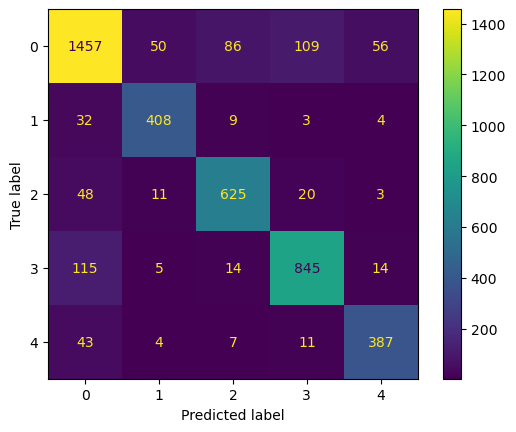

In [81]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])

reports.loc[len(reports.index)] = ["SVM", "All Clustered", "Default", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


from sklearn import metrics
print(np.mean(predicted == y_test))

# so Yes it seems to do much better with that 
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)


cm = confusion_matrix(y_test, predicted, labels=text_clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_2.classes_, )
disp.plot()

# SVM clustered on simpliefied data

1        2
6        2
8        2
9        2
21       2
        ..
16541    2
16542    2
16549    2
16551    2
16555    2
Name: label, Length: 7797, dtype: int32
0.9000377216144851
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       378
           1       0.90      0.86      0.88       813
           2       0.89      0.94      0.91      1460

    accuracy                           0.90      2651
   macro avg       0.91      0.88      0.89      2651
weighted avg       0.90      0.90      0.90      2651



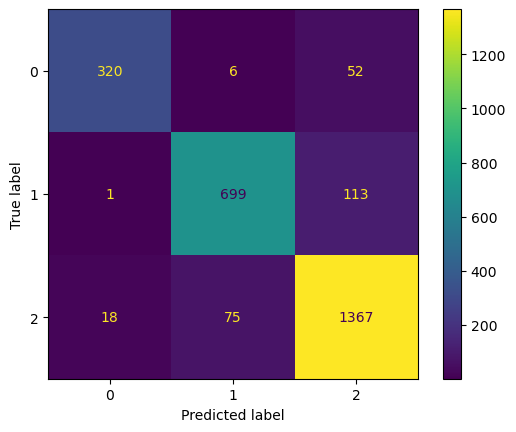

In [82]:
copy = simp_data_cluster.copy()

y = copy['label']

print(y)

copy = copy.drop(columns=['label'])

# print(cluster)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copy, y,
                                                stratify=y, 
                                                test_size=0.34)

# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])

reports.loc[len(reports.index)] = ["SVM", "Simple Clustered", "Default", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


from sklearn import metrics
print(np.mean(predicted == y_test))

# so Yes it seems to do much better with that 
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

cm = confusion_matrix(y_test, predicted, labels=text_clf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_2.classes_, )
disp.plot()


In [83]:
for i in range(len(reports)):
    print('Algo: ', reports['algo'][i], '| Data: ', reports['data'][i], '| Parameters: ',reports['grid'][i], '| Accuracy: ', round(reports['mean'][i],3))
    print('-------------------------------------------------------------------------------')
    print(reports['report'][i])
    print("\n")
    print('-------------------------------------------------------------------------------')

Algo:  Naive Bayes | Data:  Unbalanced | Parameters:  Default | Accuracy:  0.378
-------------------------------------------------------------------------------
                       precision    recall  f1-score   support

Children's literature       0.88      0.03      0.05       503
              Fantasy       0.00      0.00      0.00       213
              Fiction       0.62      0.01      0.03       552
     Historical novel       0.00      0.00      0.00       262
              Mystery       0.70      0.66      0.68       727
      Science Fiction       0.30      0.99      0.46       869
  Speculative fiction       1.00      0.00      0.01       491

             accuracy                           0.38      3617
            macro avg       0.50      0.24      0.18      3617
         weighted avg       0.56      0.38      0.26      3617



-------------------------------------------------------------------------------
Algo:  Naive Bayes | Data:  Unbalanced | Parameters:  Chosen 

# All the results

Naive Bayes Unbalanced Default 0.3784904617085983
Naive Bayes Unbalanced Chosen 0.5971799834116671
Naive Bayes ROS Default 0.6300801769422173
Naive Bayes ROS Chosen 0.6143212607132983
SVM Unbalanced Default 0.6483273431020182
SVM Unbalanced Chosen 0.595797622338955
SVM ROS Default 0.6513685374619851
SVM ROS Chosen 0.5988388166989218
Naive Bayes Unbalanced and Simplified Chosen 0.7551867219917012


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (7).

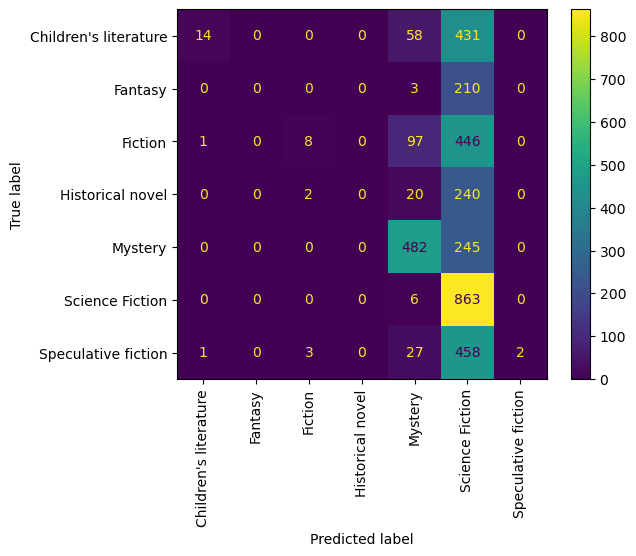

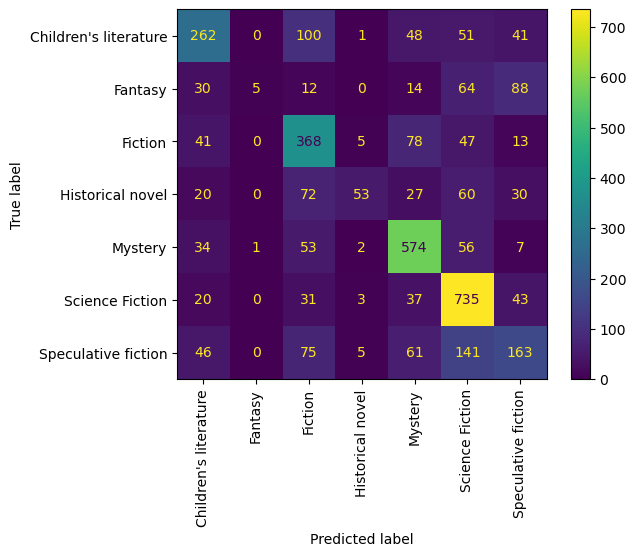

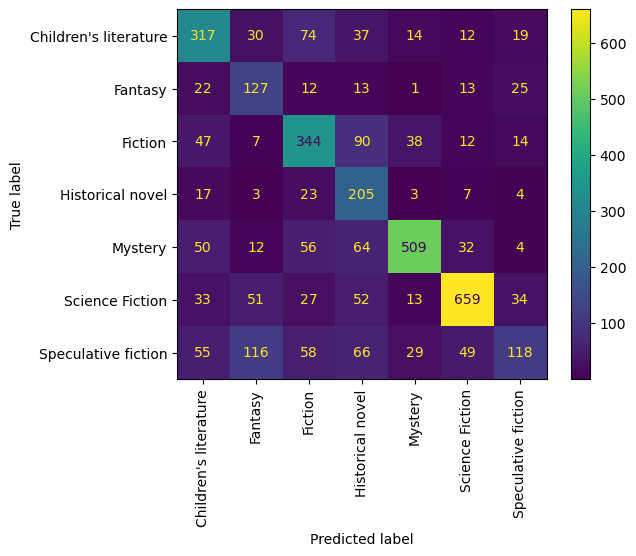

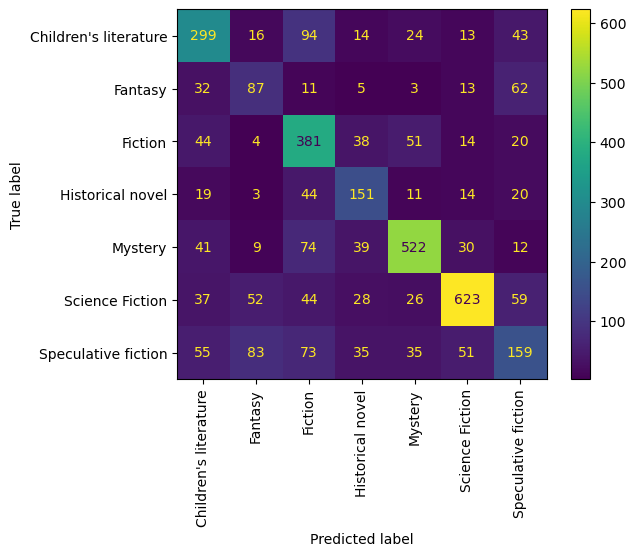

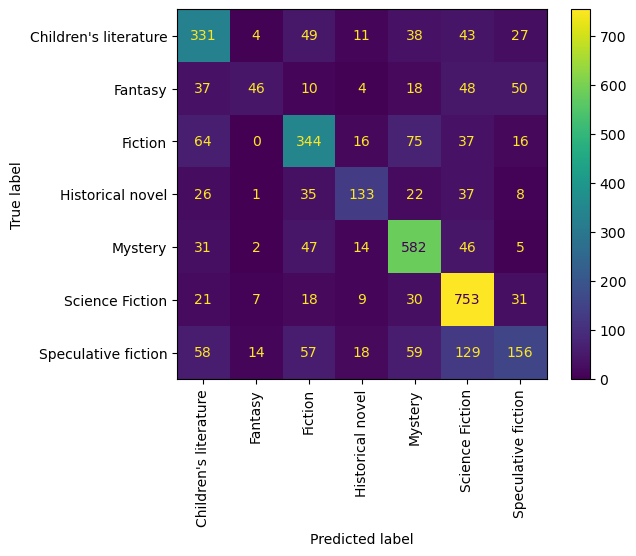

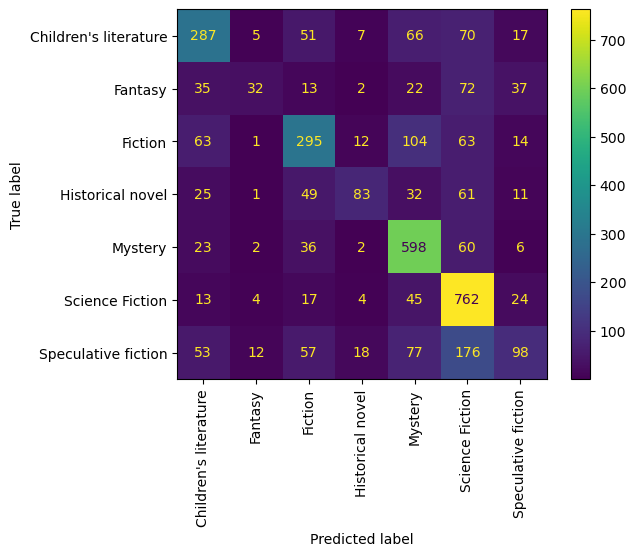

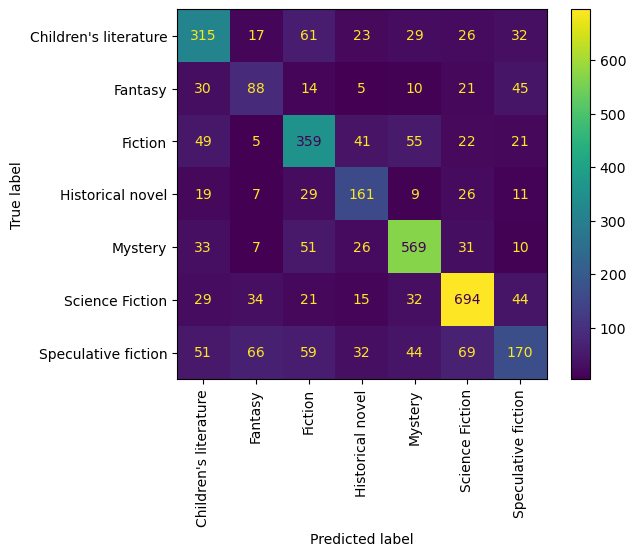

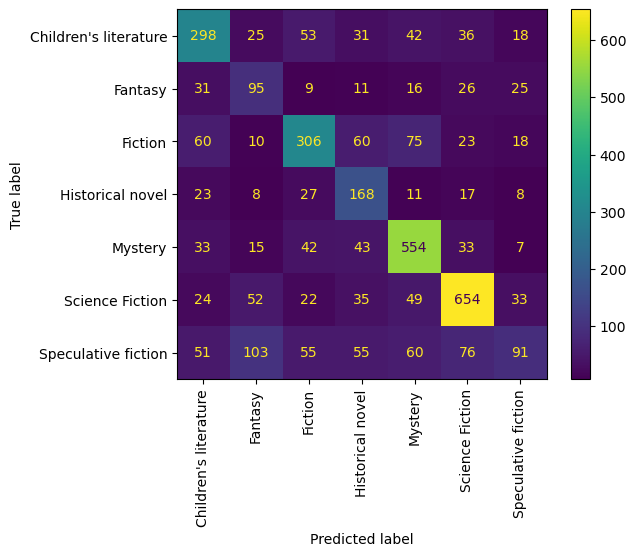

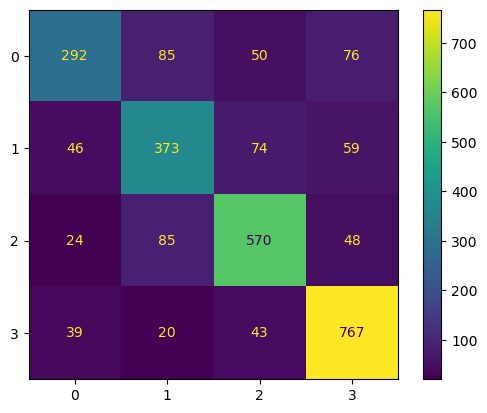

In [84]:
for i in range(len(reports)):
#     cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
    print(reports['algo'][i], reports['data'][i], reports['grid'][i], reports['mean'][i])
    disp = ConfusionMatrixDisplay(confusion_matrix=reports['confusion matrix'][i], display_labels=text_clf_1_ros.classes_, )
    disp.plot(xticks_rotation = 'vertical')